In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler



In [ ]:
company = pd.read_csv('Company_Data.csv') 
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.shape

(400, 11)

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company[company.duplicated()] #checking for any duplicates in the dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


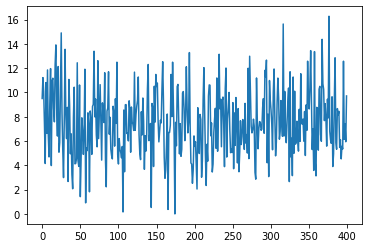

In [ ]:
plt.plot(company['Sales'])

In [ ]:
company['Sales'] = pd.cut(company['Sales'],3) #converting the sales column into the range so that we can convert it into categorical data


In [ ]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,"(5.423, 10.847]",138,73,11,276,120,Bad,42,17,Yes,Yes
1,"(10.847, 16.27]",111,48,16,260,83,Good,65,10,Yes,Yes
2,"(5.423, 10.847]",113,35,10,269,80,Medium,59,12,Yes,Yes
3,"(5.423, 10.847]",117,100,4,466,97,Medium,55,14,Yes,Yes
4,"(-0.0163, 5.423]",141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,"(10.847, 16.27]",138,108,17,203,128,Good,33,14,Yes,Yes
396,"(5.423, 10.847]",139,23,3,37,120,Medium,55,11,No,Yes
397,"(5.423, 10.847]",162,26,12,368,159,Medium,40,18,Yes,Yes
398,"(5.423, 10.847]",100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
le = LabelEncoder()

In [ ]:
company['Sales'] = le.fit_transform(company['Sales']) #converting dataset into catogorical data
company['ShelveLoc'] = le.fit_transform(company['ShelveLoc'])
company['Urban'] = le.fit_transform(company['Urban'])
company['US'] = le.fit_transform(company['US'])

In [ ]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [ ]:
min = MinMaxScaler() #transforming the dataset to get better result
std_company =  min.fit_transform(company)
std_company = pd.DataFrame(std_company,columns=('Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'))

In [ ]:
std_company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.5,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,1.0,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.5,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.5,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.0,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.5,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.5,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.5,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [ ]:
std_company['Sales'] = le.fit_transform(std_company['Sales'])
std_company['ShelveLoc'] = le.fit_transform(std_company['ShelveLoc'])
std_company['Urban'] = le.fit_transform(std_company['Urban'])
std_company['US'] = le.fit_transform(std_company['US'])

In [ ]:
X = std_company.iloc[:,1:] #Splitting the data into featuers and labels
X.head()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0


In [ ]:
Y = std_company.iloc[:,0] #Splitting the data into featuers and labels
Y.head()

0    1
1    2
2    1
3    1
4    0
Name: Sales, dtype: int64

In [ ]:
std_company['Sales'].value_counts()

1    247
0    102
2     51
Name: Sales, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20) # Converting the data into train and test data

In [ ]:
max_depth = np.array(range(1,10)) # checking for the best hyperparameter using gridsearchcv
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},


In [ ]:
print('The optimum number of Max Depth is',grid.best_params_)
print('The best Score is',grid.best_score_)

The optimum number of Max Depth is {'max_depth': 4}
The best Score is 0.7075


In [ ]:
decision = DecisionTreeClassifier(criterion='entropy',max_depth=4) # model building
decision.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decision.score(x_test,y_test) #Checking the accuracy of the model

0.7125

[Text(147.312, 195.696, 'X[5] <= 0.5\nentropy = 1.295\nsamples = 320\nvalue = [79, 201, 40]'),
 Text(66.96000000000001, 152.208, 'X[4] <= 0.44\nentropy = 1.083\nsamples = 74\nvalue = [40, 33, 1]'),
 Text(26.784000000000002, 108.72, 'X[3] <= 0.118\nentropy = 0.832\nsamples = 22\nvalue = [3, 18, 1]'),
 Text(13.392000000000001, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(40.176, 65.232, 'X[3] <= 0.593\nentropy = 0.592\nsamples = 21\nvalue = [3, 18, 0]'),
 Text(26.784000000000002, 21.744, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(53.568000000000005, 21.744, 'entropy = 0.845\nsamples = 11\nvalue = [3, 8, 0]'),
 Text(107.13600000000001, 108.72, 'X[6] <= 0.664\nentropy = 0.867\nsamples = 52\nvalue = [37, 15, 0]'),
 Text(93.74400000000001, 65.232, 'X[4] <= 0.674\nentropy = 0.99\nsamples = 34\nvalue = [19, 15, 0]'),
 Text(80.352, 21.744, 'entropy = 0.983\nsamples = 26\nvalue = [11, 15, 0]'),
 Text(107.13600000000001, 21.744, 'entropy = 0.0\nsamples = 8\nvalue

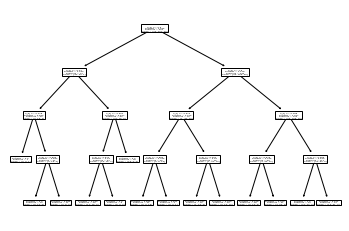

In [ ]:
tree.plot_tree(decision)

In [ ]:
pred = decision.predict(x_test) # predicting the result using test data
pd.Series(pred).value_counts()

1    69
0     8
2     3
dtype: int64

# Question 2

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.isna().sum() # Checking if there is any null value

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

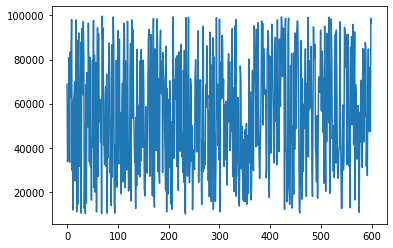

In [4]:
plt.plot(fraud['Taxable.Income'])

In [5]:
fraud = fraud.rename({'Marital.Status':'Marital','Taxable.Income':'Tax','City.Population':'Population','Work.Experience':'Work_Experience'},axis=1) 
# Changing the names of some colomns for better understanding

In [6]:
fraud.head()

,Undergrad,Marital,Tax,Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
fraud["Income_Nature"]="<=30000" #converting the data into good and risky 
fraud.loc[fraud["Tax"]>=30000,"Income_Nature"]="Good"
fraud.loc[fraud["Tax"]<=30000,"Income_Nature"]="Risky"

In [8]:
fraud

,Undergrad,Marital,Tax,Population,Work_Experience,Urban,Income_Nature
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
fraud['Income_Nature'].value_counts()

Good     476
Risky    124
Name: Income_Nature, dtype: int64

In [10]:
fraud = fraud.drop(columns='Tax') # droping the tax column because it is not helpful for model building

In [11]:
fraud.columns

Index(['Undergrad', 'Marital', 'Population', 'Work_Experience', 'Urban',
       'Income_Nature'],
      dtype='object')

In [12]:
coder = LabelEncoder() # Converting into categorical data

In [13]:
fraud['Undergrad'] = coder.fit_transform(fraud['Undergrad'])
fraud['Marital'] = coder.fit_transform(fraud['Marital'])
fraud['Urban'] = coder.fit_transform(fraud['Urban'])
fraud['Income_Nature'] = coder.fit_transform(fraud['Income_Nature'])

In [14]:
fraud.head()

,Undergrad,Marital,Population,Work_Experience,Urban,Income_Nature
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [15]:
max = MinMaxScaler() # Standardizing the data
std_fraud = max.fit_transform(fraud)

In [16]:
std_fraud = pd.DataFrame(std_fraud,columns=('Undergrad','Marital','Population','Work_Experience','Urban','Income_Nature'))
std_fraud.head()

,Undergrad,Marital,Population,Work_Experience,Urban,Income_Nature
0,0.0,1.0,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.010081,0.933333,0.0,0.0


In [17]:
std_fraud['Income_Nature'].value_counts()

0.0    476
1.0    124
Name: Income_Nature, dtype: int64

In [18]:
X1 = std_fraud.iloc[:,0:5] #Splitting the data into featuers and labels


In [19]:
Y1 = std_fraud.iloc[:,5] #Splitting the data into featuers and labels
Y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Income_Nature, dtype: float64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2,random_state=20) # converting into test and train data

In [47]:
decision1 = DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=200) #Model building
decision1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=200,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
prediction = decision1.predict(x_test) #predicting the result for the test data

In [53]:
acc = accuracy_score(y_test,prediction) #Calculating the accuracy for the model
print('Accuracy is',np.round(acc*100,2))

Accuracy is 78.33


In [42]:
path = decision1.cost_complexity_pruning_path(x_train,y_train) #Cost complexity pruning to overcome overfitting problem
ccp_alphas,impurities = path.ccp_alphas , path.impurities

In [44]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='entropy',max_depth=2,ccp_alpha=ccp_alpha)
  clf.fit(x_train,y_train)
  clfs.append(clf)

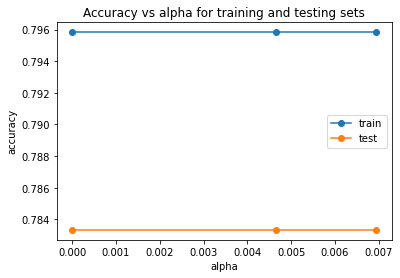

In [46]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

There is no problem of overfitting 